In [3]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import timeit
from citipy import citipy
import time
from datetime import datetime
import requests
from scipy.stats import linregress
import gmaps

# Import the API key.
from config import weather_api_key
from config import g_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
city_data_to_load = "weather_data/cities.csv"
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(14)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Zhuhai,CN,2022-07-17 15:01:15,22.2769,113.5678,88.86,84,40,11.50
1,1,Te Anau,NZ,2022-07-17 15:01:16,-45.4167,167.7167,50.77,90,100,8.97
2,2,Bethel,US,2022-07-17 15:01:16,41.3712,-73.4140,83.19,71,45,1.99
3,3,Seoul,KR,2022-07-17 15:01:17,37.5683,126.9778,76.44,73,16,3.18
4,4,Aktau,KZ,2022-07-17 15:01:17,43.6500,51.2000,84.78,50,0,11.10
5,5,Hermanus,ZA,2022-07-17 15:01:18,-34.4187,19.2345,63.70,71,0,17.83
6,6,Atuona,PF,2022-07-17 15:01:18,-9.8000,-139.0333,77.83,76,23,20.45
7,7,Khatanga,RU,2022-07-17 15:01:18,71.9667,102.5000,59.74,61,100,7.49
8,8,San Juan,AR,2022-07-17 15:00:45,-31.5375,-68.5364,54.05,22,0,11.95
9,9,Bonfim,BR,2022-07-17 15:01:19,3.0833,-59.9500,85.96,64,47,2.98


In [6]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

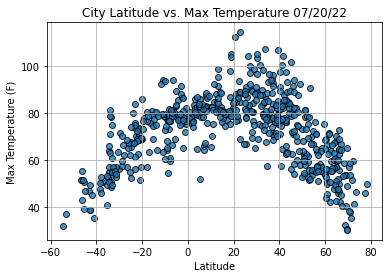

In [7]:
# Build the scatter plot for latitude vs. max temperature.

max_temps = city_data_df["Max Temp"]
lats = city_data_df["Lat"]

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

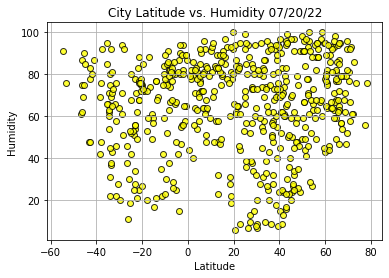

In [8]:
# Build the scatter plot for latitude vs. Humidity.

humid = city_data_df["Humidity"]
lats = city_data_df["Lat"]

plt.scatter(lats,
            humid,
            edgecolor="black", color="yellow", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

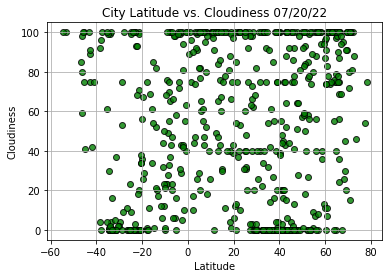

In [9]:
# Build the scatter plot for latitude vs. Cloudiness.
cloud = city_data_df["Cloudiness"]
lats = city_data_df["Lat"]

plt.scatter(lats,
            cloud,
            edgecolor="black", color="green", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

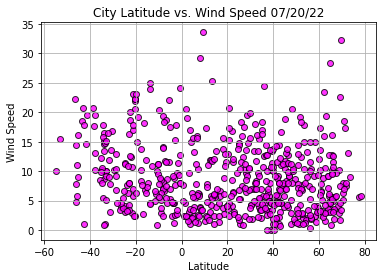

In [10]:
# Build the scatter plot for latitude vs. Wind Speed.
wind = city_data_df["Wind Speed"]
lats = city_data_df["Lat"]

plt.scatter(lats,
            wind,
            edgecolor="black", color="magenta", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [11]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [12]:
# the 13 displays the first column's 14th row (remember, python starts at 0)
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                    Egvekinot
Country                        RU
Date          2022-07-17 15:01:21
Lat                       66.3167
Lng                     -179.1667
Max Temp                     42.3
Humidity                       95
Cloudiness                    100
Wind Speed                   4.92
Name: 13, dtype: object

In [13]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
569     True
570     True
571    False
572     True
573     True
Name: Lat, Length: 574, dtype: bool

In [14]:
city_data_df["Lat"] <= 0

0      False
1       True
2      False
3      False
4      False
       ...  
569    False
570    False
571     True
572    False
573    False
Name: Lat, Length: 574, dtype: bool

In [15]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Zhuhai,CN,2022-07-17 15:01:15,22.2769,113.5678,88.86,84,40,11.50
2,2,Bethel,US,2022-07-17 15:01:16,41.3712,-73.4140,83.19,71,45,1.99
3,3,Seoul,KR,2022-07-17 15:01:17,37.5683,126.9778,76.44,73,16,3.18
4,4,Aktau,KZ,2022-07-17 15:01:17,43.6500,51.2000,84.78,50,0,11.10
7,7,Khatanga,RU,2022-07-17 15:01:18,71.9667,102.5000,59.74,61,100,7.49


In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

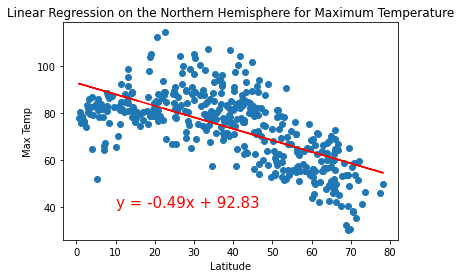

In [17]:
# Linear regression on the Northern Hemisphere "Max Temp"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

In [18]:
linregress (northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

LinregressResult(slope=-0.4878831419487793, intercept=92.83248859822797, rvalue=-0.6404300043877573, pvalue=8.726833128666013e-48, stderr=0.029253963839367705, intercept_stderr=1.2613327375541994)

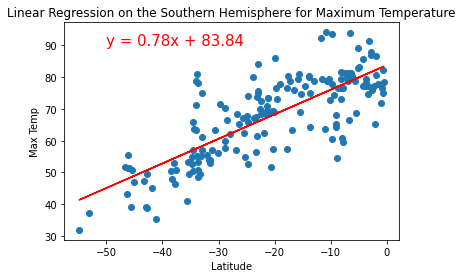

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50, 90))

In [20]:
linregress (southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

LinregressResult(slope=0.7755429344091668, intercept=83.83955704231967, rvalue=0.7805922803946044, pvalue=1.5719601286009286e-36, stderr=0.04762832711642864, intercept_stderr=1.1864537815418743)

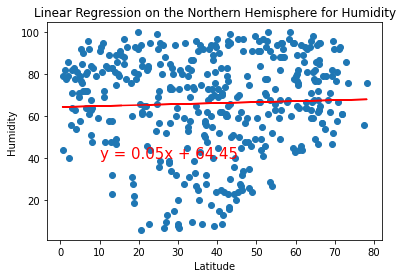

In [21]:
# Linear regression on the Northern Hemisphere "Humidity"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Humidity', "Humidity",(10,40))

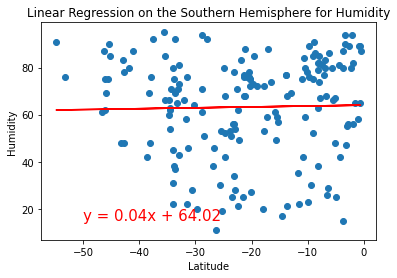

In [22]:
# Linear regression on the Southern Hemisphere "Humidity"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Humidity', "Humidity",(-50, 15))

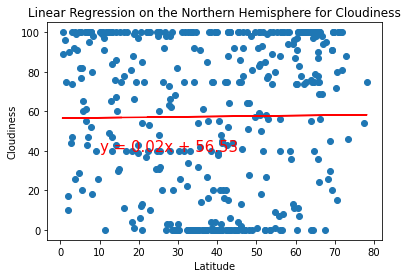

In [23]:
# Linear regression on the Northern Hemisphere "Cloudiness"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', "Cloudiness",(10,40))

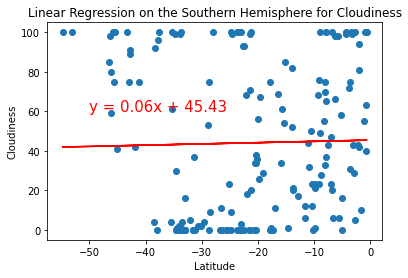

In [24]:
# Linear regression on the Southern Hemisphere "Cloudiness"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudiness', "Cloudiness",(-50, 60))

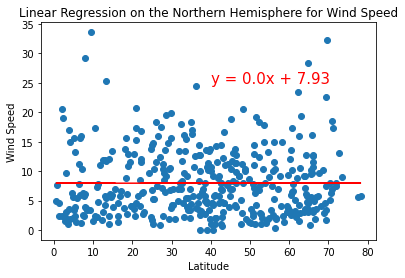

In [25]:
# Linear regression on the Northern Hemisphere "Wind Speed"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', "Wind Speed",(40,25))

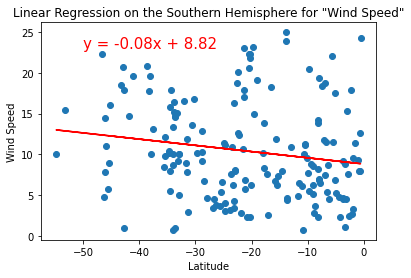

In [26]:
# Linear regression on the Southern Hemisphere "Wind Speed"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for "Wind Speed"', "Wind Speed",(-50, 23))

In [28]:
city_data_df.dtypes


City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [29]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [34]:
# Get the maximum temperature.

#max_temp = city_data_df["Max Temp"]
#temps = []
#for temp in max_temp:
    #temps.append(max(temp, 0))
    #or:
    
#heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])

WeightedHeatmap(data_bounds=[(-44.840725166045345, -179.99999), (85.0, 179.99999)], locations=[(22.2769, 113.5…

In [39]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], 
                                 dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# Heatmap of percent Cloudiness
locations = city_data_df[["Lat", "Lng"]]
cludiness = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=cludiness, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [42]:
# Heatmap of percent Wind Speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [61]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 77
What is the maximum temperature you would like for your trip? 89


In [62]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Zhuhai,CN,2022-07-17 15:01:15,22.2769,113.5678,88.86,84,40,11.50
2,2,Bethel,US,2022-07-17 15:01:16,41.3712,-73.4140,83.19,71,45,1.99
4,4,Aktau,KZ,2022-07-17 15:01:17,43.6500,51.2000,84.78,50,0,11.10
6,6,Atuona,PF,2022-07-17 15:01:18,-9.8000,-139.0333,77.83,76,23,20.45
9,9,Bonfim,BR,2022-07-17 15:01:19,3.0833,-59.9500,85.96,64,47,2.98
14,14,Taman,RU,2022-07-17 15:01:21,45.2117,36.7161,78.60,59,4,10.42
22,22,Kapaa,US,2022-07-17 15:01:25,22.0752,-159.3190,77.11,82,100,4.00
24,24,Cabo San Lucas,MX,2022-07-17 15:01:26,22.8909,-109.9124,84.61,44,10,3.00
33,33,Ponta Do Sol,PT,2022-07-17 15:01:29,32.6667,-17.1000,79.72,79,34,8.39
40,40,Port Elizabeth,ZA,2022-07-17 15:01:32,-33.9180,25.5701,81.10,31,1,8.68


In [63]:
preferred_cities_df.count()

City_ID       202
City          202
Country       202
Date          202
Lat           202
Lng           202
Max Temp      202
Humidity      202
Cloudiness    202
Wind Speed    202
dtype: int64

In [64]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Zhuhai,CN,88.86,22.2769,113.5678,
2,Bethel,US,83.19,41.3712,-73.4140,
4,Aktau,KZ,84.78,43.6500,51.2000,
6,Atuona,PF,77.83,-9.8000,-139.0333,
9,Bonfim,BR,85.96,3.0833,-59.9500,
14,Taman,RU,78.60,45.2117,36.7161,
22,Kapaa,US,77.11,22.0752,-159.3190,
24,Cabo San Lucas,MX,84.61,22.8909,-109.9124,
33,Ponta Do Sol,PT,79.72,32.6667,-17.1000,
40,Port Elizabeth,ZA,81.10,-33.9180,25.5701,


In [65]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'AeJbb3dxAWcv6QSM6vOj0WK5jd7LvozOqM-k08bS8Rsd_v0TafP_E26JcH4WZ_OEYgAZbDh32Op0ZcvOlLK0ZotA6RSEW1cNIew_SWjAUynGfqBnwsNMlBujAungSAcuJn7KV0-HDtGECvNq67gQMHAKcxbw8WmDkYwHJ8vfjR5p5F8xlBls2SYGWkbI_BeHDOqNePYPpXtK-uv6pzCujIS4VuA1UG-g6lqSAQM5VYZTSf01Qjdw1EYWBpywZAKK-71daFKAugBPO3CD9y1CB7Gu2mYWOYt3R4GDMB9HAbakpmHV2twABlwuflwFtj7HH0HU7mispWyAapiRt6UtJGbTbXKzqKhdFPYEiegZUL0ya_g5KQ9iKPko51cZ4MUH2UVH50Eq6MOvVf9_4jLvKJ1bcnBqvN4SXn-qiTAKO-_lSahebLW8MiMSbcUg',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

In [66]:
len(hotels["results"])

20

In [75]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
     hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [76]:
hotel_df.head()

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Zhuhai,CN,88.86,22.2769,113.5678,珠海粤财假日酒店
2,Bethel,US,83.19,41.3712,-73.4140,Courtyard by Marriott Danbury
4,Aktau,KZ,84.78,43.6500,51.2000,Silk Way Hotel
6,Atuona,PF,77.83,-9.8000,-139.0333,Villa Enata
9,Bonfim,BR,85.96,3.0833,-59.9500,
14,Taman,RU,78.60,45.2117,36.7161,Staryy Gorod G. Taman'
22,Kapaa,US,77.11,22.0752,-159.3190,Sheraton Kauai Coconut Beach Resort
24,Cabo San Lucas,MX,84.61,22.8909,-109.9124,Hotel Tesoro Los Cabos
33,Ponta Do Sol,PT,79.72,32.6667,-17.1000,Hotel do Campo
40,Port Elizabeth,ZA,81.10,-33.9180,25.5701,39 On Nile Guest House


In [77]:
hotel_df.count()

City          202
Country       202
Max Temp      202
Lat           202
Lng           202
Hotel Name    202
dtype: int64

In [79]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [80]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))